<center>
<h1> Linear Regression Case Study
</center>

### Steps for Regression Modeling:
1. Business problem definition - One of major automobile company would like to design new product which can improve the sales. Inorder to define the product, they want to understand/identify drivers for the sales (what are the factors driving sales) and Predicting sales of different car models given driving factors. 
2. Convert business problem into statistical problem  sales = F(sales attributes, product features, marketing info etc.)
3. Finding the right technique - Since it is predicting value (Regression Problem) problem so we can use OLS as one of the technique. We can also use other techniques like Decision Trees, Ensemble learning, KNN, SVM, ANN etc.
4. Data colletion(Y, X) - Identify the sources of information and collect the data
5. Consolidate the data - aggregate and consolidate the data at Model level/customer level/store level depends on business problem
6. Data preparation for modeling (create data audit report to identify the steps to perform as part of data preparation)
    a. missing value treatment
    b. outlier treatment
    c. dummy variable creation
7. Variable creation by using transformation and derived variable creation.
8. Basic assumptions (Normality, linearity, no outliers, homoscadasticity, no pattern in residuals, no auto correlation etc)
9. Variable reduction techniques (removing multicollinerity with the help of FA/PCA, correlation matrics, VIF)
10. Create dev and validation data sets (50:50 if you have more data else 70:30 or 80:20)
11. Modeling on dev data set (identify significant variables, model interpretation, check the signs and coefficients, multi-collinierity check, measures of good neess fit, final mathematical equation etc)
12. validating on validation data set (check the stability of model, scoring, decile analysis, cross validation etc.)
13. Output interpretation and derive insights (understand the limitations of the model and define strategy to implementation)
14. convert statistical solution into business solutions (implementation, model monitoring etc)


### import the packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#!pip install pandas_profiling 
import pandas_profiling 
import scipy.stats as stats
import statsmodels as sm
%matplotlib inline

import sklearn as sk

plt.rcParams['figure.figsize'] = 6, 4
plt.rcParams['axes.grid'] = True

/Users/sb/anaconda3/lib/python3.6/site-packages/pandas_profiling/plot.py:15: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/Users/sb/anaconda3/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/Users/sb/anaconda3/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/Users/sb/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/Users/sb/anaconda3/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/Users/sb/anaconda3/lib/python3.6/site-packages/ipykernel/kernelapp.py", line 486, in start
    self.io_loo

In [2]:
import statsmodels.formula.api as smf

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

#from sklearn.preprocessing import imputation
#from sklearn.preprocessing import StandardScaler
#from sklearn.linear_model import  Lasso, Ridge, ElasticNet
#from sklearn.decomposition import PCA
#from sklearn.manifold import TSNE
#from sklearn.cluster import KMeans, DBSCAN
#from sklearn.svm import SVR
#from sklearn.neighbors import KNeighborsRegressor
#from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor

### create UDFs

In [3]:
# Create Data audit Report for continuous variables
def continuous_var_summary(x):
    return pd.Series([x.count(), x.isnull().sum(), x.sum(), x.mean(), x.median(),  
                      x.std(), x.var(), x.min(), x.quantile(0.01), x.quantile(0.05),
                          x.quantile(0.10),x.quantile(0.25),x.quantile(0.50),x.quantile(0.75), 
                              x.quantile(0.90),x.quantile(0.95), x.quantile(0.99),x.max()], 
                  index = ['N', 'NMISS', 'SUM', 'MEAN','MEDIAN', 'STD', 'VAR', 'MIN', 'P1', 
                               'P5' ,'P10' ,'P25' ,'P50' ,'P75' ,'P90' ,'P95' ,'P99' ,'MAX'])

In [4]:
# Create Data audit Report for categorical variables
def categorical_var_summary(x):
    Mode = x.value_counts().sort_values(ascending = False)[0:1].reset_index()
    return pd.Series([x.count(), x.isnull().sum(), Mode.iloc[0, 0], Mode.iloc[0, 1], 
                          round(Mode.iloc[0, 1] * 100/x.count(), 2)], 
                  index = ['N', 'NMISS', 'MODE', 'FREQ', 'PERCENT'])

In [5]:
# Missing value imputation for categorical and continuous variables
def missing_imputation(x, stats = 'mean'):
    if (x.dtypes == 'float64') | (x.dtypes == 'int64'):
        x = x.fillna(x.mean()) if stats == 'mean' else x.fillna(x.median())
    else:
        x = x.fillna(x.mode())
    return x

In [18]:
# An utility function to create dummy variable
def create_dummies(df, colname):
    col_dummies = pd.get_dummies(df[colname], prefix = colname, drop_first = True)
    df = pd.concat([df, col_dummies], axis = 1)
    df.drop(colname, axis = 1, inplace = True )
    return df

In [17]:
#pd.get_dummies(cars['Manufacturer'], prefix = 'Manufacturer',drop_first=True)

,Manufacturer_Audi,Manufacturer_BMW,Manufacturer_Buick,Manufacturer_Cadillac,Manufacturer_Chevrolet,Manufacturer_Chrysler,Manufacturer_Dodge,Manufacturer_Ford,Manufacturer_Honda,Manufacturer_Hyundai,...,Manufacturer_Oldsmobile,Manufacturer_Plymouth,Manufacturer_Pontiac,Manufacturer_Porsche,Manufacturer_Saab,Manufacturer_Saturn,Manufacturer_Subaru,Manufacturer_Toyota,Manufacturer_Volkswagen,Manufacturer_Volvo
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### import data

In [6]:
cars = pd.read_csv('Car_sales.csv')

### data inspection

In [31]:
cars.head(10)

,Manufacturer,Model,Sales_in_thousands,four_year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,Integra,16.919,16.360,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150
1,Acura,TL,39.384,19.875,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,6/3/2011,91.370778
2,Acura,CL,14.114,18.225,Passenger,NaN,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,1/4/2012,NaN
3,Acura,RL,8.588,29.725,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,3/10/2011,91.389779
4,Audi,A4,20.397,22.255,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10/8/2011,62.777639
5,Audi,A6,18.780,23.555,Passenger,33.95,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22.0,8/9/2011,84.565105
6,Audi,A8,1.380,39.000,Passenger,62.00,4.2,310.0,113.0,74.0,198.2,3.902,23.7,21.0,2/27/2012,134.656858
7,BMW,323i,19.747,NaN,Passenger,26.99,2.5,170.0,107.3,68.4,176.0,3.179,16.6,26.0,6/28/2011,71.191207
8,BMW,328i,9.231,28.675,Passenger,33.40,2.8,193.0,107.3,68.5,176.0,3.197,16.6,24.0,1/29/2012,81.877069
9,BMW,528i,17.527,36.125,Passenger,38.90,2.8,193.0,111.4,70.9,188.0,3.472,18.5,25.0,4/4/2011,83.998724


In [7]:
# profiling using pandas profiling
#!pip install pandas_profiling

import pandas_profiling 
pandas_profiling.ProfileReport(cars)

Number of variables,16
Number of observations,157
Total Missing (%),1.9%
Total size in memory,19.7 KiB
Average record size in memory,128.5 B
Numeric,10
Categorical,4
Boolean,0
Date,0
Text (Unique),0
Rejected,2


In [33]:
# export the file as html
# screen the variables to get rid of unuseful variable sin the begining or
# make a note of potential variables for model refinement
report.to_file(output_file = 'profilereport.html')

NameError: name 'report' is not defined

In [34]:
# type conversion in case variables are not of proper type : Not required in this data

In [8]:
# seperate categorical and continuous variables
cars_conti_vars = cars.loc[:, (cars.dtypes == 'float64') | (cars.dtypes == 'int64')]
cars_cat_vars = cars.loc[:, (cars.dtypes == 'object')]

# Simper way of doing:
# cars_conti_vars = cars.select_dtypes(include = ['float64', 'int64'])
# car_sales_cat = cars.select_dtypes(include = ['object'])
cars_cat_vars

,Manufacturer,Model,Vehicle_type,Latest_Launch
0,Acura,Integra,Passenger,2/2/2012
1,Acura,TL,Passenger,6/3/2011
2,Acura,CL,Passenger,1/4/2012
3,Acura,RL,Passenger,3/10/2011
4,Audi,A4,Passenger,10/8/2011
5,Audi,A6,Passenger,8/9/2011
6,Audi,A8,Passenger,2/27/2012
7,BMW,323i,Passenger,6/28/2011
8,BMW,328i,Passenger,1/29/2012
9,BMW,528i,Passenger,4/4/2011


In [9]:
# alternate of .describe() for continuous variables
#cars_conti_vars.apply(lambda x: continuous_var_summary(x)).T.round(2) #lambda not required
cars_conti_vars.apply(continuous_var_summary).T.round(2) #lambda not required

,N,NMISS,SUM,MEAN,MEDIAN,STD,VAR,MIN,P1,P5,P10,P25,P50,P75,P90,P95,P99,MAX
Sales_in_thousands,157.0,0.0,8320.70,53.00,29.45,68.03,4628.00,0.11,0.94,1.87,5.45,14.11,29.45,67.96,127.64,185.34,260.65,540.56
four_year_resale_value,121.0,36.0,2186.83,18.07,14.18,11.45,131.18,5.16,6.17,7.85,9.12,11.26,14.18,19.88,32.08,41.25,60.22,67.55
Price_in_thousands,155.0,2.0,4245.57,27.39,22.80,14.35,205.97,9.24,10.23,12.47,13.97,18.02,22.80,31.95,44.02,55.83,78.48,85.50
Engine_size,156.0,1.0,477.50,3.06,3.00,1.04,1.09,1.00,1.56,1.80,1.95,2.30,3.00,3.58,4.60,4.78,5.70,8.00
Horsepower,156.0,1.0,29008.00,185.95,177.50,56.70,3214.93,55.00,96.40,114.50,120.00,149.50,177.50,215.00,254.00,300.00,325.75,450.00
Wheelbase,156.0,1.0,16768.00,107.49,107.00,7.64,58.39,92.60,92.88,95.87,98.65,103.00,107.00,112.20,115.50,119.25,134.37,138.70
Width,156.0,1.0,11099.40,71.15,70.55,3.45,11.92,62.60,66.09,66.50,66.90,68.40,70.55,73.43,76.20,78.20,79.19,79.90
Length,156.0,1.0,29225.60,187.34,187.90,13.43,180.41,149.40,154.92,163.68,173.00,177.58,187.90,196.12,203.40,208.50,219.30,224.50
Curb_weight,155.0,2.0,523.59,3.38,3.34,0.63,0.40,1.90,2.25,2.42,2.61,2.97,3.34,3.80,4.12,4.39,5.40,5.57
Fuel_capacity,156.0,1.0,2800.50,17.95,17.20,3.89,15.12,10.30,11.90,12.50,13.20,15.80,17.20,19.58,23.20,25.40,30.90,32.00


In [10]:
# alternate of .describe() for categorical variables
cars_cat_vars.apply(categorical_var_summary).T

,N,NMISS,MODE,FREQ,PERCENT
Manufacturer,157,0,Ford,11,7.01
Model,157,0,Neon,2,1.27
Vehicle_type,157,0,Passenger,116,73.89
Latest_Launch,157,0,6/25/2011,2,1.27


### outlier treatment

In [11]:
cars_conti_vars = cars_conti_vars.apply(lambda x: x.clip(lower = x.quantile(0.01), upper = x.quantile(0.99)))

In [12]:
cars_conti_vars.apply(continuous_var_summary).T.round(2)

,N,NMISS,SUM,MEAN,MEDIAN,STD,VAR,MIN,P1,P5,P10,P25,P50,P75,P90,P95,P99,MAX
Sales_in_thousands,157.0,0.0,8025.53,51.12,29.45,57.72,3331.91,0.94,0.95,1.87,5.45,14.11,29.45,67.96,127.64,185.34,253.56,260.65
four_year_resale_value,121.0,36.0,2180.42,18.02,14.18,11.18,125.02,6.17,6.42,7.85,9.12,11.26,14.18,19.88,32.08,41.25,59.90,60.22
Price_in_thousands,155.0,2.0,4235.96,27.33,22.80,14.06,197.80,10.23,10.48,12.47,13.97,18.02,22.80,31.95,44.02,55.83,76.58,78.48
Engine_size,156.0,1.0,475.81,3.05,3.00,0.98,0.96,1.56,1.58,1.80,1.95,2.30,3.00,3.58,4.60,4.78,5.70,5.70
Horsepower,156.0,1.0,28910.30,185.32,177.50,52.82,2789.58,96.40,98.38,114.50,120.00,149.50,177.50,215.00,254.00,300.00,317.09,325.75
Wheelbase,156.0,1.0,16760.10,107.44,107.00,7.42,55.12,92.88,93.00,95.87,98.65,103.00,107.00,112.20,115.50,119.25,132.52,134.37
Width,156.0,1.0,11102.45,71.17,70.55,3.39,11.49,66.09,66.26,66.50,66.90,68.40,70.55,73.43,76.20,78.20,79.14,79.19
Length,156.0,1.0,29223.94,187.33,187.90,13.12,172.14,154.92,156.23,163.68,173.00,177.58,187.90,196.12,203.40,208.50,217.10,219.30
Curb_weight,155.0,2.0,523.77,3.38,3.34,0.62,0.39,2.25,2.25,2.42,2.61,2.97,3.34,3.80,4.12,4.39,5.39,5.40
Fuel_capacity,156.0,1.0,2799.90,17.95,17.20,3.82,14.59,11.90,11.90,12.50,13.20,15.80,17.20,19.58,23.20,25.40,30.40,30.90


### missing value treatment

In [13]:
cars_conti_vars = cars_conti_vars.apply(missing_imputation)
cars_cat_vars = cars_cat_vars.apply(missing_imputation)

In [14]:
cars_conti_vars.apply(continuous_var_summary).T.round(1)

,N,NMISS,SUM,MEAN,MEDIAN,STD,VAR,MIN,P1,P5,P10,P25,P50,P75,P90,P95,P99,MAX
Sales_in_thousands,157.0,0.0,8025.5,51.1,29.4,57.7,3331.9,0.9,0.9,1.9,5.5,14.1,29.4,68.0,127.6,185.3,253.6,260.6
four_year_resale_value,157.0,0.0,2829.1,18.0,17.7,9.8,96.2,6.2,6.9,8.4,9.7,12.5,17.7,18.1,27.0,39.3,59.3,60.2
Price_in_thousands,157.0,0.0,4290.6,27.3,23.4,14.0,195.3,10.2,10.5,12.5,14.0,18.1,23.4,31.9,43.8,55.2,76.5,78.5
Engine_size,157.0,0.0,478.9,3.1,3.0,1.0,1.0,1.6,1.6,1.8,2.0,2.3,3.0,3.5,4.6,4.8,5.7,5.7
Horsepower,157.0,0.0,29095.6,185.3,180.0,52.6,2771.7,96.4,98.4,114.6,120.0,150.0,180.0,215.0,253.8,300.0,316.9,325.7
Wheelbase,157.0,0.0,16867.5,107.4,107.0,7.4,54.8,92.9,93.0,95.9,98.7,103.0,107.0,112.2,115.5,119.2,132.5,134.4
Width,157.0,0.0,11173.6,71.2,70.6,3.4,11.4,66.1,66.3,66.5,66.9,68.4,70.6,73.4,76.2,78.2,79.1,79.2
Length,157.0,0.0,29411.3,187.3,187.8,13.1,171.0,154.9,156.3,163.7,173.1,177.6,187.8,196.1,203.3,208.5,217.1,219.3
Curb_weight,157.0,0.0,530.5,3.4,3.4,0.6,0.4,2.2,2.2,2.4,2.6,3.0,3.4,3.8,4.1,4.4,5.4,5.4
Fuel_capacity,157.0,0.0,2817.8,17.9,17.2,3.8,14.5,11.9,11.9,12.5,13.2,15.8,17.2,19.5,23.2,25.4,30.4,30.9


## Handling categorical features

scikit-learn expects all features to be numeric. So how do we include a categorical feature in our model?

- **Ordered categories:** transform them to sensible numeric values (example: small=1, medium=2, large=3)
- **Unordered categories:** use dummy encoding (0/1)

What are the categorical features in our dataset?

- **Ordered categories:** weather (already encoded with sensible numeric values)
- **Unordered categories:** season (needs dummy encoding), holiday (already dummy encoded), workingday (already dummy encoded)

For season, we can't simply leave the encoding as 1 = spring, 2 = summer, 3 = fall, and 4 = winter, because that would imply an **ordered relationship**. Instead, we create **multiple dummy variables:**

In [42]:
# get the count of all the categories of the variable
cars_cat_vars.Manufacturer.value_counts()

Ford          11
Dodge         11
Mercedes-B     9
Toyota         9
Chevrolet      9
Mitsubishi     7
Chrysler       7
Nissan         7
Lexus          6
Pontiac        6
Volvo          6
Oldsmobile     6
Volkswagen     6
Mercury        6
Honda          5
Saturn         5
Cadillac       5
Acura          4
Buick          4
Plymouth       4
Lincoln        3
Hyundai        3
Audi           3
BMW            3
Jeep           3
Porsche        3
Saab           2
Subaru         2
Jaguar         1
Infiniti       1
Name: Manufacturer, dtype: int64

In [19]:
# get the useful categorical variables
cars_cat_vars = cars[['Manufacturer', 'Vehicle_type']]

# for c_feature in categorical_features
for c_feature in ['Manufacturer', 'Vehicle_type']:
    cars_cat_vars[c_feature] = cars_cat_vars[c_feature].astype('category')
    cars_cat_vars = create_dummies(cars_cat_vars, c_feature)
    
# see the data in the output
#cars_cat_vars

/Users/sb/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


### final data for analysis

In [20]:
cars_new = pd.concat([cars_conti_vars, cars_cat_vars], axis = 1)

In [21]:
cars_new.head()

,Sales_in_thousands,four_year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,...,Manufacturer_Plymouth,Manufacturer_Pontiac,Manufacturer_Porsche,Manufacturer_Saab,Manufacturer_Saturn,Manufacturer_Subaru,Manufacturer_Toyota,Manufacturer_Volkswagen,Manufacturer_Volvo,Vehicle_type_Passenger
0,16.919,16.360,21.500000,1.8,140.0,101.2,67.3,172.4,2.639,13.2,...,0,0,0,0,0,0,0,0,0,1
1,39.384,19.875,28.400000,3.2,225.0,108.1,70.3,192.9,3.517,17.2,...,0,0,0,0,0,0,0,0,0,1
2,14.114,18.225,27.328745,3.2,225.0,106.9,70.6,192.0,3.470,17.2,...,0,0,0,0,0,0,0,0,0,1
3,8.588,29.725,42.000000,3.5,210.0,114.6,71.4,196.6,3.850,18.0,...,0,0,0,0,0,0,0,0,0,1
4,20.397,22.255,23.990000,1.8,150.0,102.6,68.2,178.0,2.998,16.4,...,0,0,0,0,0,0,0,0,0,1


### assumptions check

/Users/sb/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


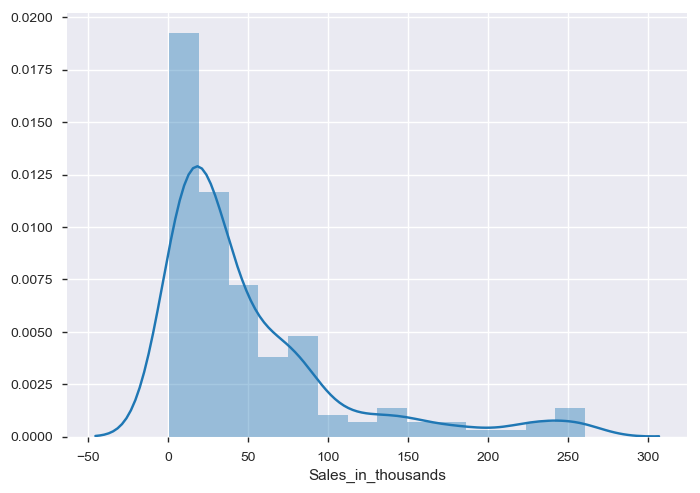

In [46]:
# Very first assumtion is that all the variables should be normally distributed, however that can't be possible
# However we have to be atleast strict about the dependant Y variable

# Distribution of variables
sns.distplot(cars_new.Sales_in_thousands)
plt.show()
# this distribution is highly skewed

# Notes:
#-----------------------------------------------------
# 1. if we get skewed data, then we have to transform the data and there are multiple methods to go about it
# 2. most commonly used and which works on most of the data is log transformation
# 3. Ideally we can do this for each of the dependant variable as well, 
#    however it will depend on amount of data and the amount of analytical rigour
# 4. In no case we can proceed if dependant variable is not normal/near to normal distributed

/Users/sb/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


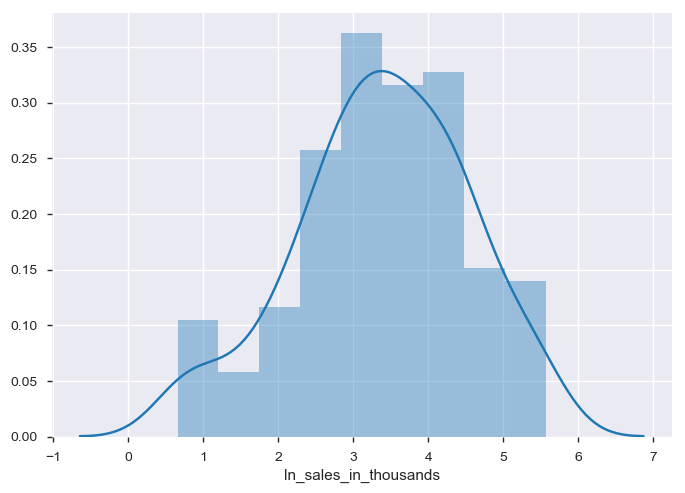

In [26]:
# Note: good practice is to take the log of the data plus 1, bcoz we don't have log of zero defined
# In thios data its not required as sales are always greater than zero

# apply log transformation: log is rescalling the data and making the distribution normal
cars_new['ln_sales_in_thousands'] = np.log(cars_new['Sales_in_thousands']+1)

# Distribution of variables
sns.distplot(cars_new.ln_sales_in_thousands)
plt.show()

In [27]:
# Linearity: correlation matrix (ranges from 1 to -1)
corrm = cars_new.corr()
corrm.to_csv('corrm.csv')
corrm

,Sales_in_thousands,four_year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,...,Manufacturer_Pontiac,Manufacturer_Porsche,Manufacturer_Saab,Manufacturer_Saturn,Manufacturer_Subaru,Manufacturer_Toyota,Manufacturer_Volkswagen,Manufacturer_Volvo,Vehicle_type_Passenger,ln_sales_in_thousands
Sales_in_thousands,1.000000,-3.075381e-01,-0.361572,-0.014342,-0.259311,0.278280,0.093054,0.200997,-0.035282,0.044446,...,0.036853,-0.114192,-7.988584e-02,-0.054683,-2.181588e-02,0.133404,-0.056294,-1.333610e-01,-0.230252,0.828538
four_year_resale_value,-0.307538,1.000000e+00,0.832320,0.440258,0.679605,-0.037624,0.158211,0.025517,0.304378,0.284274,...,-0.071303,0.512245,3.225261e-17,-0.087128,3.225261e-17,-0.030552,-0.062450,5.386266e-17,0.076638,-0.470239
Price_in_thousands,-0.361572,8.323203e-01,1.000000,0.618230,0.849851,0.118080,0.328107,0.158161,0.527230,0.430942,...,-0.062676,0.352160,1.860392e-02,-0.170025,-4.839044e-02,-0.094643,-0.137820,5.158511e-02,0.042006,-0.566486
Engine_size,-0.014342,4.402582e-01,0.618230,1.000000,0.815010,0.518423,0.702618,0.576386,0.793937,0.698341,...,0.078278,0.016675,-1.047543e-01,-0.191415,-6.401942e-02,-0.108099,-0.221271,-1.531916e-01,-0.279272,-0.109526
Horsepower,-0.259311,6.796053e-01,0.849851,0.815010,1.000000,0.325247,0.538115,0.420472,0.637823,0.526554,...,-0.001225,0.231413,-1.693190e-02,-0.227139,-4.398854e-02,-0.115857,-0.244956,-1.198690e-02,-0.011910,-0.392894
Wheelbase,0.278280,-3.762379e-02,0.118080,0.518423,0.325247,1.000000,0.681402,0.837566,0.657133,0.659706,...,0.046301,-0.260846,-4.521823e-02,-0.083508,-9.218360e-02,-0.094079,-0.203652,-8.565596e-02,-0.383084,0.269627
Width,0.093054,1.582115e-01,0.328107,0.702618,0.538115,0.681402,1.000000,0.700153,0.710589,0.648557,...,0.042237,-0.060887,-7.315767e-02,-0.200799,-1.102499e-01,-0.115710,-0.187554,-9.484845e-02,-0.241472,0.045104
Length,0.200997,2.551744e-02,0.158161,0.576386,0.420472,0.837566,0.700153,1.000000,0.622789,0.561884,...,0.096592,-0.149884,-1.422854e-02,-0.061395,-5.953822e-02,-0.103610,-0.304533,-5.911793e-02,-0.129701,0.207778
Curb_weight,-0.035282,3.043781e-01,0.527230,0.793937,0.637823,0.657133,0.710589,0.622789,1.000000,0.868131,...,0.007662,-0.094627,-4.503929e-02,-0.221474,-2.013658e-02,-0.070768,-0.161960,-3.058882e-02,-0.519405,-0.056208
Fuel_capacity,0.044446,2.842737e-01,0.430942,0.698341,0.526554,0.659706,0.648557,0.561884,0.868131,1.000000,...,-0.001650,-0.034864,-7.424594e-03,-0.260342,-4.633177e-02,-0.011787,-0.170589,-6.026328e-03,-0.594758,-0.017765


In [37]:
cars.columns

#cars_new

Index(['Manufacturer', 'Model', 'Sales_in_thousands', 'four_year_resale_value',
       'Vehicle_type', 'Price_in_thousands', 'Engine_size', 'Horsepower',
       'Wheelbase', 'Width', 'Length', 'Curb_weight', 'Fuel_capacity',
       'Fuel_efficiency', 'Latest_Launch', 'Power_perf_factor'],
      dtype='object')

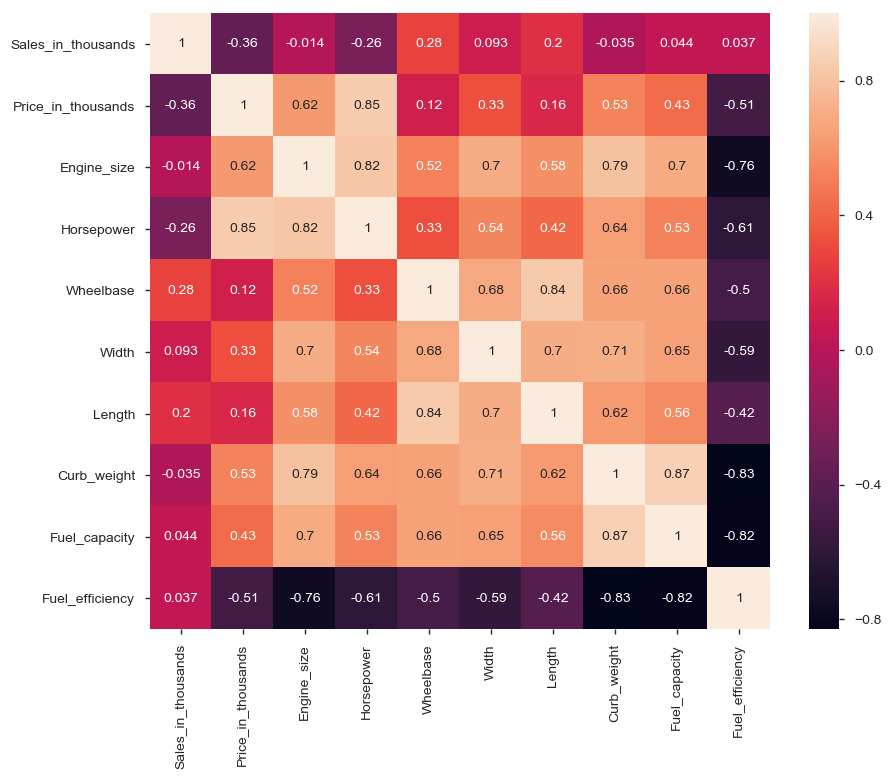

In [70]:
# visualize correlation matrix in Seaborn using a heatmap
plt.figure(figsize = (10, 8))
#sns.heatmap(cars_new.corr())

sns.heatmap(cars_new[['Sales_in_thousands', 'Price_in_thousands', 'Engine_size', 'Horsepower',
       'Wheelbase', 'Width', 'Length', 'Curb_weight', 'Fuel_capacity',
        'Fuel_efficiency']].corr(),annot=True)



# fuel efficiency vs fuel capacity
# Curb weight vs Engine Size

# in case we can't make any concrete decision looking at the variables; we can also check on the VAR of 
# the variables into consideration e.g Curb weight vs Wheel base

In [39]:
# dropping the variables based low correlation with Y
cars_new.drop(['four_year_resale_value', 'Power_perf_factor'], axis = 1, inplace = True)

#'''Manufacturer_BMW', 'Manufacturer_Buick', 'Manufacturer_Jeep', 
        #'Manufacturer_Cadillac', 'Manufacturer_Chevrolet', 'Manufacturer_Chrysler', 'Manufacturer_Hyundai', 
               #'Manufacturer_Infiniti', 'Manufacturer_Jaguar', 'Manufacturer_Lincoln','Manufacturer_Mercury',
                  # 'Manufacturer_Oldsmobile', 'Manufacturer_Pontiac', 'Manufacturer_Saab', 'Manufacturer_Saturn',
                       #'Manufacturer_Subaru','Manufacturer_Volkswagen', 'Manufacturer_Mercedes-B']'''

In [40]:
# dropping variables with less variance in the data
#cars_new.drop(['Length', 'Width'], axis = 1, inplace = True)

In [41]:
# no of variables and obs in the final data to be used for modelling
cars_new.shape

(157, 41)

### split the data for model building

In [44]:
# splitting the data: separate out the feature/input/independant columns and dependant variable
#cars_new.columns
feature_columns = cars_new.columns.difference(['ln_sales_in_thousands', 'Sales_in_thousands'])
feature_columns

Index(['Curb_weight', 'Engine_size', 'Fuel_capacity', 'Fuel_efficiency',
       'Horsepower', 'Length', 'Manufacturer_Audi', 'Manufacturer_BMW',
       'Manufacturer_Buick', 'Manufacturer_Cadillac', 'Manufacturer_Chevrolet',
       'Manufacturer_Chrysler', 'Manufacturer_Dodge', 'Manufacturer_Ford',
       'Manufacturer_Honda', 'Manufacturer_Hyundai', 'Manufacturer_Infiniti',
       'Manufacturer_Jaguar', 'Manufacturer_Jeep', 'Manufacturer_Lexus',
       'Manufacturer_Lincoln', 'Manufacturer_Mercedes-B',
       'Manufacturer_Mercury', 'Manufacturer_Mitsubishi',
       'Manufacturer_Nissan', 'Manufacturer_Oldsmobile',
       'Manufacturer_Plymouth', 'Manufacturer_Pontiac', 'Manufacturer_Porsche',
       'Manufacturer_Saab', 'Manufacturer_Saturn', 'Manufacturer_Subaru',
       'Manufacturer_Toyota', 'Manufacturer_Volkswagen', 'Manufacturer_Volvo',
       'Price_in_thousands', 'Vehicle_type_Passenger', 'Wheelbase', 'Width'],
      dtype='object')

In [53]:
# method 1: divide the data into training and testing and separate out Y and X variables
# this will be used in sklearn related functions
train, test = train_test_split(cars_new, test_size = 0.3, random_state = 56789)

#print(train.shape)
#print(test.shape)
test.head(10)

,Sales_in_thousands,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,...,Manufacturer_Pontiac,Manufacturer_Porsche,Manufacturer_Saab,Manufacturer_Saturn,Manufacturer_Subaru,Manufacturer_Toyota,Manufacturer_Volkswagen,Manufacturer_Volvo,Vehicle_type_Passenger,ln_sales_in_thousands
146,83.721,16.700,2.0,115.0,98.9,68.3,172.3,2.85300,14.5,26.000000,...,0,0,0,0,0,0,1,0,1,4.439364
134,47.107,22.695,2.5,165.0,103.5,67.5,185.8,3.41500,16.9,25.000000,...,0,0,0,0,1,0,0,0,1,3.873428
51,63.403,22.195,4.6,200.0,114.7,78.2,212.0,3.90800,19.0,21.000000,...,0,0,0,0,0,0,0,0,1,4.165160
149,5.596,17.500,2.0,115.0,98.9,68.3,163.3,2.76200,14.6,26.000000,...,0,0,0,0,0,0,1,0,1,1.886463
63,66.692,11.799,2.0,140.0,100.4,66.9,174.0,2.62600,14.5,27.000000,...,0,0,0,0,0,0,0,0,1,4.214968
38,88.028,22.505,2.7,202.0,113.0,74.7,203.7,3.48900,17.0,23.766234,...,0,0,0,0,0,0,0,0,1,4.488951
70,24.072,31.505,3.0,210.0,105.1,70.5,190.2,3.37300,18.5,23.000000,...,0,0,0,0,0,0,0,0,1,3.221752
137,247.994,17.518,2.2,133.0,105.2,70.1,188.5,2.99800,18.5,27.000000,...,0,0,0,0,0,1,0,0,1,5.517429
18,14.785,46.225,5.7,255.0,117.5,77.0,201.2,5.39668,30.0,15.000000,...,0,0,0,0,0,0,0,0,0,2.759060
91,20.380,22.510,3.3,170.0,112.2,74.9,194.7,3.94400,20.0,21.000000,...,0,0,0,0,0,0,0,0,0,3.062456


In [61]:
# method 2: required for machine learning methods available in Sklearn
train_X, test_X, train_y, test_y = train_test_split(cars_new[feature_columns], 
                                            cars_new['ln_sales_in_thousands'], test_size = 0.3, random_state = 12345)
#test_X

In [56]:
# verify the no of obs in training and testing after split
print('No of obs in training: ', len(train), ' | ', 'No of obs in testing: ', len(test))

No of obs in training:  109  |  No of obs in testing:  48


## Form of linear regression

$y = \beta_0 + \beta_1x_1 + \beta_2x_2 + ... + \beta_nx_n$

- $y$ is the response
- $\beta_0$ is the intercept
- $\beta_1$ is the coefficient for $x_1$ (the first feature)
- $\beta_n$ is the coefficient for $x_n$ (the nth feature)

The $\beta$ values are called the **model coefficients**:

- These values are estimated (or "learned") during the model fitting process using the **least squares criterion**.
- Specifically, we are find the line (mathematically) which minimizes the **sum of squared residuals** (or "sum of squared errors").
- And once we've learned these coefficients, we can use the model to predict the response.

### building a linear regression model

## model 1

In [89]:
# Step 1 and Step 2: define Y, X and build a ols model
lm1 = smf.ols('''ln_sales_in_thousands ~ Engine_size+ Fuel_efficiency+
       Manufacturer_Ford+Manufacturer_Plymouth+ Price_in_thousands+ Vehicle_type_Passenger+
       Wheelbase''', train).fit()
print(lm1.summary())

                              OLS Regression Results                             
Dep. Variable:     ln_sales_in_thousands   R-squared:                       0.622
Model:                               OLS   Adj. R-squared:                  0.595
Method:                    Least Squares   F-statistic:                     23.70
Date:                   Sat, 05 Oct 2019   Prob (F-statistic):           9.10e-19
Time:                           17:06:09   Log-Likelihood:                -112.75
No. Observations:                    109   AIC:                             241.5
Df Residuals:                        101   BIC:                             263.0
Df Model:                              7                                         
Covariance Type:               nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------

####  VIF (Variance Inflation Factor): Check the multicollinieirity for all the variables in the model

In [90]:
# High VIF of the variable means information in that variable has already been explained by 
# other X variables present in the model

model_param='''ln_sales_in_thousands ~ Engine_size+ Fuel_efficiency+
       Manufacturer_Ford+Manufacturer_Plymouth+ Price_in_thousands+ Vehicle_type_Passenger+
       Wheelbase'''

# import the packages for vif
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices

# separate the Y and X variables
y, X = dmatrices(model_param, train, return_type = 'dataframe')

# For each X, calculate VIF and save in dataframe
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF Factor'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# display the output
vif.round(1)

,Features,VIF Factor
0,Intercept,614.1
1,Engine_size,3.0
2,Fuel_efficiency,4.1
3,Manufacturer_Ford,1.0
4,Manufacturer_Plymouth,1.0
5,Price_in_thousands,2.1
6,Vehicle_type_Passenger,2.0
7,Wheelbase,1.5


In [123]:
# Step 4: predict the sales on the training data
train['pred_sales'] = np.exp(lm1.predict(train))
train.head()

/Users/sb/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Sales_in_thousands,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,...,Manufacturer_Mitsubishi,Manufacturer_Nissan,Manufacturer_Plymouth,Manufacturer_Porsche,Manufacturer_Toyota,Manufacturer_Volvo,Vehicle_type_Passenger,ln_sales_in_thousands,pred_sales,Deciles
54,125.33800,36.135,4.6,240.0,119.0,78.7,204.6,4.808,26.0,16.0,...,0,0,0,0,0,0,0,2.098083,7.837786,9
52,260.64532,31.930,4.0,210.0,111.6,70.2,190.7,3.876,21.0,19.0,...,0,0,0,0,0,0,0,2.416050,7.532756,9
141,65.11900,22.368,3.0,194.0,114.2,73.4,193.5,3.759,20.9,22.0,...,0,0,0,0,1,0,0,1.813708,7.677424,9
8,9.23100,33.400,2.8,193.0,107.3,68.5,176.0,3.197,16.6,24.0,...,0,0,0,0,0,0,1,0.965249,3.122510,2
131,5.22300,14.290,1.9,124.0,102.4,66.4,176.9,2.452,12.1,31.0,...,0,0,0,0,0,0,1,0.717920,5.498765,7


In [118]:
# Step 5: predict the sales on the testing/validation data
test['pred_sales'] = np.exp(lm1.predict(test))
test.head()

/Users/sb/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Sales_in_thousands,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,...,Manufacturer_Lexus,Manufacturer_Mitsubishi,Manufacturer_Nissan,Manufacturer_Plymouth,Manufacturer_Porsche,Manufacturer_Toyota,Manufacturer_Volvo,Vehicle_type_Passenger,ln_sales_in_thousands,pred_sales
70,24.07200,31.505,3.0,210.0,105.100,70.5,190.200,3.373,18.5,23.0,...,1,0,0,0,0,0,0,1,1.381512,2.971213
42,31.03800,18.575,3.9,175.0,127.200,78.8,208.500,4.298,30.9,16.0,...,0,0,0,0,0,0,0,0,1.491894,7.959916
56,260.64532,26.935,4.6,220.0,134.375,79.1,219.305,4.241,25.1,18.0,...,0,0,0,0,0,0,0,0,2.416050,17.287691
35,76.03400,12.640,2.0,132.0,105.000,74.4,174.400,2.567,12.5,29.0,...,0,0,0,0,0,0,0,1,1.881008,5.633640
16,6.53600,39.665,4.6,275.0,108.000,75.5,200.600,3.843,19.0,22.0,...,0,0,0,0,0,0,0,1,0.815312,3.094674


In [121]:
# Step 6: accuracy metrics (a. MAPE: Mean Absolute Percentage Error)
MAPE_train = np.mean(np.abs(train['Sales_in_thousands'] - train['pred_sales'])/train['Sales_in_thousands'])

MAPE_test = np.mean(np.abs(test['Sales_in_thousands'] - test['pred_sales'])/test['Sales_in_thousands'])

# print the values of MAPE for train and test
print('MAPE of training data: ', MAPE_train,  ' | ', 'MAPE of testing data: ', MAPE_test)

MAPE of training data:  0.8188261685839869  |  MAPE of testing data:  0.7975653488828077


In [124]:
# Step 6: accuracy metrics (d. Decile Analysis: for validation of models - Business validation)

# create the 10 groups in the data
train['Deciles'] = pd.qcut(train['pred_sales'], 10, labels = False)
test['Deciles'] = pd.qcut(test['pred_sales'], 10, labels = False)

# Decile Analysis for train data
Predicted_avg = train[['Deciles', 'pred_sales']].groupby(train.Deciles).mean().sort_index(ascending = False)['pred_sales']
Actual_avg = train[['Deciles', 'Sales_in_thousands']].groupby(train.Deciles).mean().sort_index(ascending = False)['Sales_in_thousands']
Decile_analysis_train = pd.concat([Predicted_avg, Actual_avg], axis = 1).reset_index()

# Decile Analysis for test data
Predicted_avg = test[['Deciles', 'pred_sales']].groupby(test.Deciles).mean().sort_index(ascending = False)['pred_sales']
Actual_avg = test[['Deciles', 'Sales_in_thousands']].groupby(test.Deciles).mean().sort_index(ascending = False)['Sales_in_thousands']
Decile_analysis_test = pd.concat([Predicted_avg, Actual_avg], axis = 1).reset_index()

# write the data into the file
Decile_analysis_train.to_csv('Decile_analysis_train.csv')
Decile_analysis_test.to_csv('Decile_analysis_test.csv')

/Users/sb/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/Users/sb/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [125]:
Decile_analysis_train

,Deciles,pred_sales,Sales_in_thousands
0,9,8.919751,136.446211
1,8,6.302464,113.262273
2,7,5.424874,59.676182
3,6,4.835880,60.303182
4,5,4.362564,40.154700
5,4,3.982146,34.717818
6,3,3.684151,28.223091
7,2,3.281656,19.894727
8,1,2.869262,16.505636
9,0,1.955961,4.061480


In [128]:
Decile_analysis_test

,Deciles,pred_sales,Sales_in_thousands
0,9,11.533107,122.160864
1,8,6.257070,69.605000
2,7,5.171079,61.857600
3,6,4.794074,59.192500
4,5,4.302969,48.020600
5,4,3.863252,60.343800
6,3,3.625598,39.769750
7,2,3.234463,13.453800
8,1,2.913989,24.291800
9,0,1.432724,5.093856


## model 2

In [129]:
# get all the independant variables for model creation
model_param = 'ln_sales_in_thousands ~ ' + ' + '.join(feature_columns)

#model_param='''ln_sales_in_thousands ~ Engine_size+Fuel_efficiency+
 #      Manufacturer_Ford+ Manufacturer_Plymouth+ Manufacturer_Porsche+ Manufacturer_Toyota+
  #     Price_in_thousands+ Vehicle_type_Passenger+
   #    Wheelbase'''

In [130]:
# Step 1 and Step 2: define Y, X and build a ols model
lm2 = smf.ols(model_param, train).fit()

In [131]:
# Step 3: get the output summary of the model
print(lm2.summary())

                              OLS Regression Results                             
Dep. Variable:     ln_sales_in_thousands   R-squared:                       0.643
Model:                               OLS   Adj. R-squared:                  0.556
Method:                    Least Squares   F-statistic:                     7.452
Date:                   Sat, 24 Aug 2019   Prob (F-statistic):           5.77e-12
Time:                           16:17:49   Log-Likelihood:                -33.511
No. Observations:                    109   AIC:                             111.0
Df Residuals:                         87   BIC:                             170.2
Df Model:                             21                                         
Covariance Type:               nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------

#### feature selection based on importance using F - Regression

In [133]:
# Feature Selection based on importance
from sklearn.feature_selection import f_regression
features = train_X
target = train_y
F_values, p_values  = f_regression(features, target )

In [134]:
import itertools
f_reg_results = [(i, v, z) for i, v, z in itertools.zip_longest(features.columns, F_values,  ['%.3f' % p for p in p_values])]
f_reg_results=pd.DataFrame(f_reg_results, columns=['Variable','F_Value', 'P_Value'])
f_reg_results

,Variable,F_Value,P_Value
0,Curb_weight,0.000038,0.995
1,Engine_size,0.547392,0.461
2,Fuel_capacity,0.005523,0.941
3,Fuel_efficiency,2.058368,0.154
4,Horsepower,14.813868,0.000
5,Length,6.670120,0.011
6,Manufacturer_Audi,3.577542,0.061
7,Manufacturer_Dodge,3.849178,0.052
8,Manufacturer_Ford,13.642003,0.000
9,Manufacturer_Honda,6.424069,0.013


In [135]:
f_reg_results.sort_values(by = ['P_Value'])
f_reg_results.P_Value = pd.to_numeric(f_reg_results.P_Value)

In [136]:
f_reg_results_new = f_reg_results[f_reg_results.P_Value <= 0.1]
f_reg_results_new

,Variable,F_Value,P_Value
4,Horsepower,14.813868,0.000
5,Length,6.670120,0.011
6,Manufacturer_Audi,3.577542,0.061
7,Manufacturer_Dodge,3.849178,0.052
8,Manufacturer_Ford,13.642003,0.000
9,Manufacturer_Honda,6.424069,0.013
11,Manufacturer_Mitsubishi,2.781523,0.098
13,Manufacturer_Plymouth,2.906201,0.091
14,Manufacturer_Porsche,10.713800,0.001
17,Price_in_thousands,41.183846,0.000


If p - values are less, then variables are siginificant in the regression equation.

#### execute the model on training and testing samples

In [137]:
# Step 4: predict the sales on the training data
train['pred_sales'] = np.exp(lm2.predict(train))

/Users/sb/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [138]:
# Step 5: predict the sales on the testing/validation data
test['pred_sales'] = np.exp(lm2.predict(test))

/Users/sb/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


#### model validation for prediction

In [140]:
# Step 6: accuracy metrics (a. MAPE: Mean Absolute Percentage Error)
MAPE_train = '%.3f' % np.mean(np.abs(train.Sales_in_thousands - train.pred_sales)/train.Sales_in_thousands)
MAPE_test = '%.3f' % np.mean(np.abs(test.Sales_in_thousands - test.pred_sales)/test.Sales_in_thousands)

# print the values of MAPE for train and test
print('MAPE of training data: ', MAPE_train,  ' | ', 'MAPE of testing data: ', MAPE_test)

MAPE of training data:  0.810  |  MAPE of testing data:  0.793


In [141]:
# Step 6: accuracy metrics (b. RMSE: Root Mean Squared Error)
RMSE_train = mean_squared_error(train.Sales_in_thousands ,train.pred_sales).round(3)
RMSE_test = mean_squared_error(test.Sales_in_thousands ,test.pred_sales).round(3)

# print the values of RMSE for train and test
print('RMSE of training data: ', RMSE_train,  ' | ', 'RMSE of testing data: ', RMSE_test)

RMSE of training data:  5478.755  |  RMSE of testing data:  4875.633


In [142]:
# Step 6: accuracy metrics (c. Correlation)
Corr_train = stats.stats.pearsonr(train.Sales_in_thousands, train.pred_sales)
Corr_test = stats.stats.pearsonr(train.Sales_in_thousands, train.pred_sales)

# print the values of Correlation for train and test
print('Correlation of training data: ', Corr_train,  ' | ', 'Correlation of testing data: ', Corr_test)

Correlation of training data:  (0.7466309757728876, 1.1711005018444226e-20)  |  Correlation of testing data:  (0.7466309757728876, 1.1711005018444226e-20)


In [144]:
# Step 6: accuracy metrics (d. Decile Analysis: for validation of models - Business validation)

# create the 10 groups in the data
train['Deciles'] = pd.qcut(train['pred_sales'], 10, labels = False)
test['Deciles'] = pd.qcut(test['pred_sales'], 10, labels = False)

# Decile Analysis for train data
Predicted_avg = train[['Deciles', 'pred_sales']].groupby(train.Deciles).mean().sort_index(ascending = False)['pred_sales']
Actual_avg = train[['Deciles', 'Sales_in_thousands']].groupby(train.Deciles).mean().sort_index(ascending = False)['Sales_in_thousands']
Decile_analysis_train = pd.concat([Predicted_avg, Actual_avg], axis = 1).reset_index()

# Decile Analysis for train data
Predicted_avg = test[['Deciles', 'pred_sales']].groupby(test.Deciles).mean().sort_index(ascending = False)['pred_sales']
Actual_avg = test[['Deciles', 'Sales_in_thousands']].groupby(test.Deciles).mean().sort_index(ascending = False)['Sales_in_thousands']
Decile_analysis_test = pd.concat([Predicted_avg, Actual_avg], axis = 1).reset_index()

# write the data into the file
Decile_analysis_train.to_csv('Decile_analysis_train.csv')
Decile_analysis_test.to_csv('Decile_analysis_test.csv')
Decile_analysis_test

/Users/sb/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/Users/sb/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


,Deciles,pred_sales,Sales_in_thousands
0,9,10.746118,138.627064
1,8,6.089940,64.464400
2,7,5.287890,32.334200
3,6,4.785451,69.315750
4,5,4.283975,51.811200
5,4,3.684963,65.504600
6,3,3.430936,14.492250
7,2,3.230958,21.749000
8,1,2.709278,37.366400
9,0,1.273250,5.093856


#### validate the poor model performance due of LM assumptions

/Users/sb/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


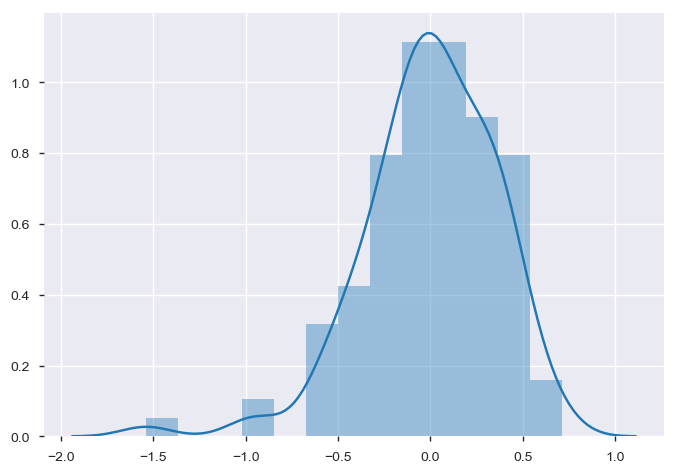

In [145]:
# assumption: Normality of the residuals/error (using distplot)
sns.distplot(lm1.resid)
plt.show()

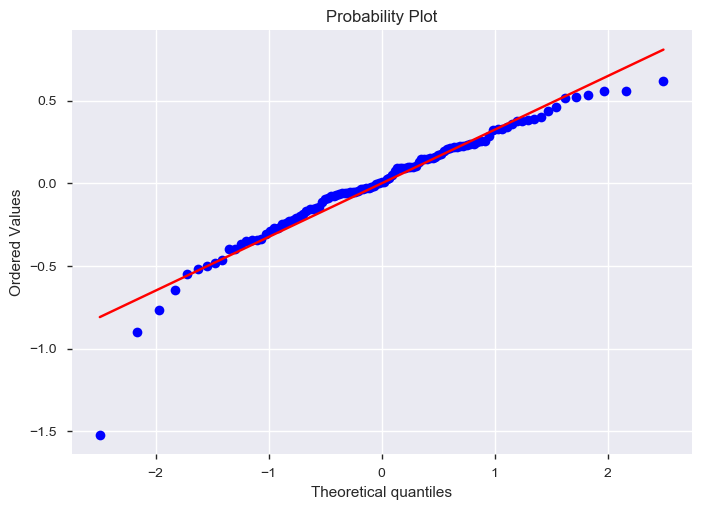

In [146]:
# assumption: Normality of the residuals/error (using Q-Q plot)
from scipy import stats
import pylab

stats.probplot(lm2.resid, dist = 'norm', plot = pylab)
pylab.show()

# If errors are normally and randomly distributed, they would be following a straight line pattern
# Q-Q plot shows if the residuals are plotted along the line

In [147]:
# assumption: mean of residuals/errors is zero
print(lm1.resid.mean())

2.5909957156343792e-14


In [152]:
# assumption: residuals/errors of the model should not be correlated with dependant (Y) variable
print(stats.stats.pearsonr(lm1.resid, train.ln_sales_in_thousands))

(0.6438173845876106, 4.311887414241803e-14)


In [65]:
lm1.resid.shape

(109,)

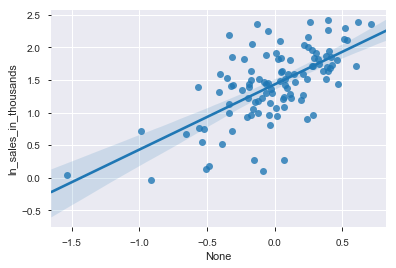

In [73]:
# assumption: homoscedasticity of residuals/errors
#!pip install --upgrade pip
#!pip install seaborn
import seaborn as sns

sns.regplot(x=lm1.resid, y=train.ln_sales_in_thousands)
#sns.jointplot(x=train.pred_sales, y=train.ln_sales_in_thousands)
#sns.scatterplot(x=train.pred_sales, y=train.ln_sales_in_thousands)
plt.show()

#### What can be the possible reasons for poor model performance?

### Tips/guidlines for imporvement of model accuracy

### Other Reading information

### Feature selection

How do we choose which features to include in the model? We're going to use **train/test split** (and eventually **cross-validation**).

Why not use of **p-values** or **R-squared** for feature selection?

- Linear models rely upon **a lot of assumptions** (such as the features being independent), and if those assumptions are violated, p-values and R-squared are less reliable. Train/test split relies on fewer assumptions.
- Features that are unrelated to the response can still have **significant p-values**.
- Adding features to your model that are unrelated to the response will always **increase the R-squared value**, and adjusted R-squared does not sufficiently account for this.
- p-values and R-squared are **proxies** for our goal of generalization, whereas train/test split and cross-validation attempt to **directly estimate** how well the model will generalize to out-of-sample data.

More generally:

- There are different methodologies that can be used for solving any given data science problem, and this course follows a **machine learning methodology**.
- This course focuses on **general purpose approaches** that can be applied to any model, rather than model-specific approaches.

### Evaluating Model Accuracy
> R-squared is a statistical measure of how close the data are to the fitted regression line. <br>
> R-square signifies percentage of variations in the reponse variable that can be explained by the model. <br>
> - R-squared = Explained variation / Total variation <br>
> - Total variation is variation of response variable around it's mean. <br>

> R-squared value varies between 0 and 100%. 0% signifies that the model explains none of the variability, <br>
while 100% signifies that the model explains all the variability of the response. <br>
The closer the r-square to 100%, the better is the model. <br>

## Other Evaluation metrics for regression problems

Evaluation metrics for classification problems, such as **accuracy**, are not useful for regression problems. We need evaluation metrics designed for comparing **continuous values**.

Here are three common evaluation metrics for regression problems:

**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Mean Squared Error** (MSE) is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

## Comparing linear regression with other models

Advantages of linear regression:

- Simple to explain
- Highly interpretable
- Model training and prediction are fast
- No tuning is required (excluding regularization)
- Features don't need scaling
- Can perform well with a small number of observations
- Well-understood

Disadvantages of linear regression:

- Presumes a linear relationship between the features and the response
- Performance is (generally) not competitive with the best supervised learning methods due to high bias
- Can't automatically learn feature interactions